In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/book-my-show/dataset.csv


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier,cv
from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, LeaveOneOut
from sklearn.model_selection import GridSearchCV, StratifiedKFold


In [3]:
df_data = pd.read_csv('/kaggle/input/book-my-show/dataset.csv')

In [4]:
print('shape of the df', df_data.shape)
df_data.head()

shape of the df (11055, 32)


,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,0,1,1,1,0,0,0,0,0,...,1,1,0,0,0,0,1,1,0,0
1,2,1,1,1,1,1,0,-1,1,0,...,1,1,0,0,-1,0,1,1,1,0
2,3,1,-1,1,1,1,0,0,0,0,...,1,1,1,0,1,0,1,-1,0,0
3,4,1,-1,1,1,1,0,0,0,1,...,1,1,0,0,1,0,1,0,1,0
4,5,1,-1,0,1,1,0,1,1,0,...,0,1,0,0,-1,0,1,1,1,1


### Exploratory Data Analysis

Each sample has 32 features ranging from -1,0,1. Explore the data using histogram, heatmaps. 

Determine the number of samples present in the data, unique elements in all the features. 

Check if there is any null value in any features. 

In [5]:
df_data.describe()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,0.656897,0.165084,0.869380,0.850294,0.870737,0.132519,0.040525,0.467119,0.331615,0.814292,...,0.806694,0.908458,0.530620,0.688557,0.295070,0.258164,0.860787,-0.163275,0.859792,0.556943
std,0.474767,0.402826,0.336999,0.356799,0.335506,0.339070,0.833195,0.678297,0.470815,0.388888,...,0.394909,0.288392,0.499084,0.463104,0.820263,0.437644,0.346184,0.961174,0.347218,0.496769
min,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,1.000000,0.000000
50%,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,-1.000000,1.000000,1.000000
75%,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
#identify the type of data in each column
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   index                        11055 non-null  object
 1   having_IPhaving_IP_Address   11055 non-null  int64 
 2   URLURL_Length                11055 non-null  int64 
 3   Shortining_Service           11055 non-null  int64 
 4   having_At_Symbol             11055 non-null  int64 
 5   double_slash_redirecting     11055 non-null  int64 
 6   Prefix_Suffix                11055 non-null  int64 
 7   having_Sub_Domain            11055 non-null  int64 
 8   SSLfinal_State               11055 non-null  int64 
 9   Domain_registeration_length  11055 non-null  int64 
 10  Favicon                      11055 non-null  int64 
 11  port                         11055 non-null  int64 
 12  HTTPS_token                  11055 non-null  int64 
 13  Request_URL                  11

In [7]:
df_data.shape

(11055, 32)

In [8]:
df_data = df_data.drop('index',1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [9]:
df_data.nunique()

having_IPhaving_IP_Address     2
URLURL_Length                  3
Shortining_Service             2
having_At_Symbol               2
double_slash_redirecting       2
Prefix_Suffix                  2
having_Sub_Domain              3
SSLfinal_State                 3
Domain_registeration_length    2
Favicon                        2
port                           2
HTTPS_token                    2
Request_URL                    2
URL_of_Anchor                  3
Links_in_tags                  3
SFH                            3
Submitting_to_email            2
Abnormal_URL                   2
Redirect                       2
on_mouseover                   2
RightClick                     2
popUpWidnow                    2
Iframe                         2
age_of_domain                  2
DNSRecord                      2
web_traffic                    3
Page_Rank                      2
Google_Index                   2
Links_pointing_to_page         3
Statistical_report             2
Result    

In [10]:
#check for NULL value in the dataset
df_data.isnull().sum().sum()

0

In [11]:
# NULL value check
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IPhaving_IP_Address   11055 non-null  int64
 1   URLURL_Length                11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

In [12]:
# Duplicate check
df1 = df_data.T
print(df1.duplicated().sum()) # there is no duplicate column values

0


### Plot histogram and heat map for data exploration

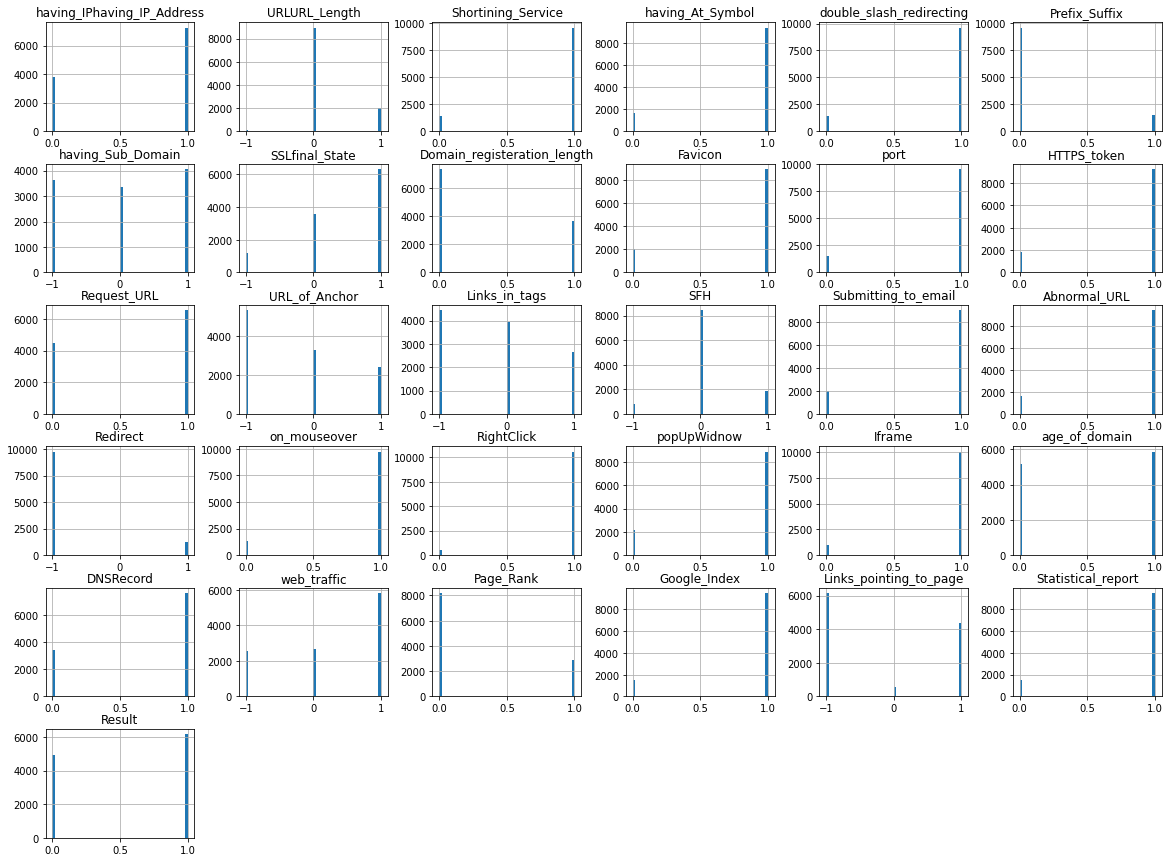

In [13]:
df_data.hist(bins=50, figsize=(20,15))
plt.show()

<AxesSubplot:>

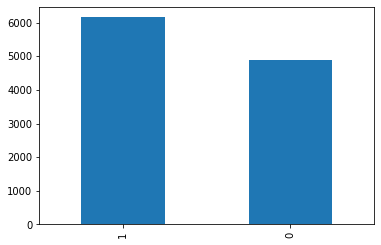

In [14]:
pd.value_counts(df_data['Result']).plot.bar()

<AxesSubplot:>

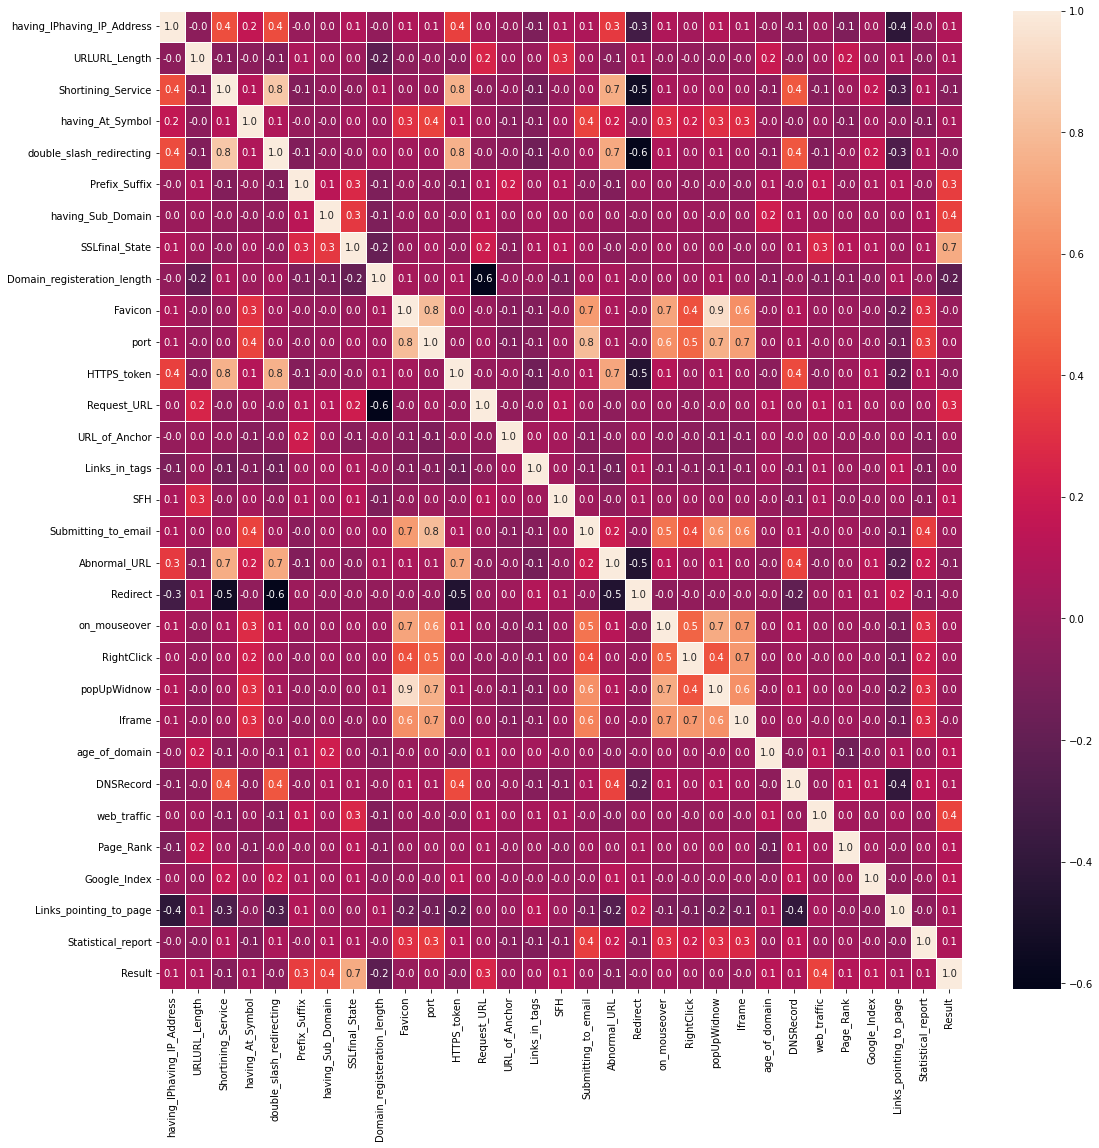

In [15]:
#correlation map
f,ax=plt.subplots(figsize=(18,18))
sns.heatmap(df_data.corr(),annot=True, linewidths=.5, fmt='.1f',ax=ax)

In [16]:
cor_matrix = df_data.corr().abs()
upper_tri=cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [17]:
# threshold greater than 0.75
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.75)]
print(to_drop)

['double_slash_redirecting', 'port', 'HTTPS_token', 'Submitting_to_email', 'popUpWidnow']


In [18]:
#drop the columns which are highly correlated 
df_data.drop(to_drop,axis=1,inplace=True)

In [19]:
df_data.shape

(11055, 26)

In [20]:
X=df_data.drop(columns='Result')
X

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,Request_URL,...,on_mouseover,RightClick,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,0,1,1,1,0,0,0,0,1,1,...,1,1,1,0,0,0,0,1,1,0
1,1,1,1,1,0,-1,1,0,1,1,...,1,1,1,0,0,-1,0,1,1,1
2,1,-1,1,1,0,0,0,0,1,1,...,1,1,1,1,0,1,0,1,-1,0
3,1,-1,1,1,0,0,0,1,1,0,...,1,1,1,0,0,1,0,1,0,1
4,1,-1,0,1,0,1,1,0,1,1,...,0,1,1,0,0,-1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,0,1,0,1,1,1,0,0,1,...,0,0,0,1,1,0,0,1,1,1
11051,0,1,1,0,0,1,0,0,0,1,...,0,1,1,1,1,1,1,1,0,1
11052,1,0,1,1,0,1,0,0,1,1,...,1,1,1,1,1,1,0,1,-1,1
11053,0,0,1,1,0,0,0,1,0,0,...,0,1,1,1,1,1,0,1,1,1


In [21]:
Y=df_data['Result']
Y= pd.DataFrame(Y)
Y.head()

,Result
0,0
1,0
2,0
3,0
4,1


In [22]:
# split train - test to 70-30
train_X,test_X,train_Y,test_Y = train_test_split(X,Y,test_size=0.3, random_state=9)

In [23]:
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

(7738, 25)
(7738, 1)
(3317, 25)
(3317, 1)


### Building Classification Model:
 
1. Build classification models using a binary classifier to detect malicious or phishing URLs.  

2. Illustrate the diagnostic ability of this binary classifier by plotting the ROC curve.

In [24]:
#model build for different binary classification and show confusion matrix

def build_model(model_name,train_X, train_Y, test_X, test_Y):
    if model_name == 'LogisticRegression':
        model=LogisticRegression()
    elif model_name =='KNeighborsClassifier':
        model = KNeighborsClassifier(n_neighbors=4)
    elif model_name == 'XGBClassifier':
        model = XGBClassifier(objective='binary:logistic',eval_metric='auc')
    else:
        print('not a valid model name')
    
    model=model.fit(train_X,train_Y)
    
    pred_prob=model.predict_proba(test_X)
    
    fpr, tpr, thresh = roc_curve(test_Y, pred_prob[:,1], pos_label=1)
    
    model_predict= model.predict(test_X)
    acc=accuracy_score(model_predict,test_Y)
    print("Accuracy: ",acc)
    
    # Classification report 
    print("Classification Report: ")
    print(classification_report(model_predict,test_Y))
    #print("Confusion Matrix for", model_name)
    con =  confusion_matrix(model_predict,test_Y)
    sns.heatmap(con,annot=True, fmt ='.2f')
    plt.suptitle('Confusion Matrix for '+model_name, x=0.44, y=1.0, ha='center', fontsize=25)
    plt.xlabel('Predict Values', fontsize =25)
    plt.ylabel('Test Values', fontsize =25)
    plt.show()
    return model, acc, fpr, tpr, thresh

### LogisticRegression Model

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  0.9092553512209828
Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1477
           1       0.92      0.92      0.92      1840

    accuracy                           0.91      3317
   macro avg       0.91      0.91      0.91      3317
weighted avg       0.91      0.91      0.91      3317



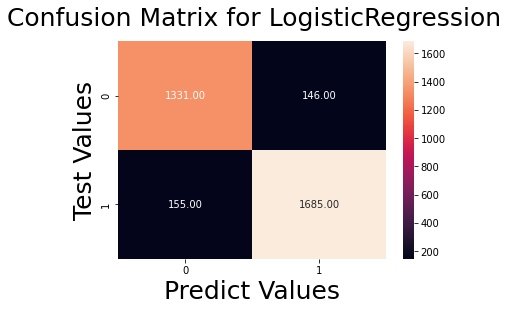

In [25]:
#Model 1 - LogisticRegression
lg_model,acc1, fpr1, tpr1, thresh1 = build_model('LogisticRegression',train_X, train_Y, test_X, test_Y.values.ravel())

### KNeighborsClassifier Model

/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy:  0.9439252336448598
Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1554
           1       0.93      0.97      0.95      1763

    accuracy                           0.94      3317
   macro avg       0.95      0.94      0.94      3317
weighted avg       0.94      0.94      0.94      3317



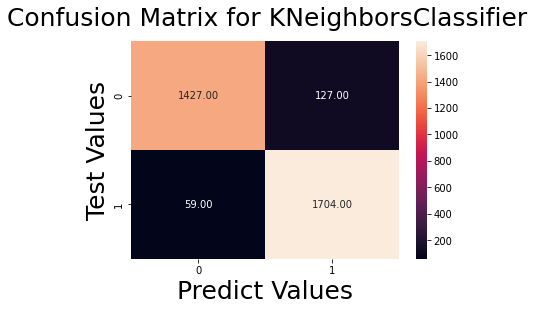

In [26]:
# Model 2 - KNeighborsClassifier
knn_model,acc2, fpr2, tpr2, thresh2 = build_model('KNeighborsClassifier',train_X, train_Y, test_X, test_Y.values.ravel())

### XGBClassifer Model

Accuracy:  0.9662345492915285
Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1482
           1       0.97      0.97      0.97      1835

    accuracy                           0.97      3317
   macro avg       0.97      0.97      0.97      3317
weighted avg       0.97      0.97      0.97      3317



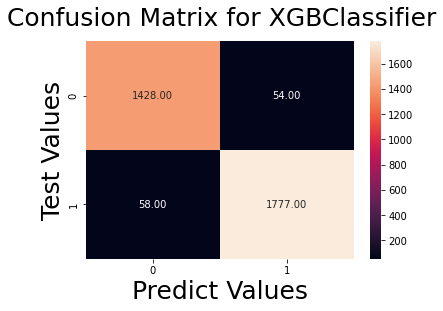

In [27]:
# Model 3 - XGBClassifier
xgb_model, acc3, fpr3, tpr3, thresh3 = build_model('XGBClassifier',train_X, train_Y, test_X, test_Y.values.ravel())

In [28]:
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(test_Y))]
p_fpr, p_tpr, _ = roc_curve(test_Y, random_probs, pos_label=1)

#### Plot ROC curve

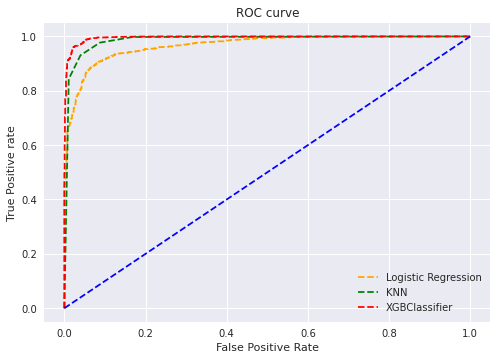

In [29]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='XGBClassifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

#### ROC plot shows XGBClassifier True Positive rate is higher than the other models.

### Validate the accuracy of data by the K-Fold cross-validation technique.

Using GridSearchCV with StratifiedKFold cross-validation technique to validate the accuracy of data and find best parameter of different binary classifier models.

#### LogisticRegression Model

In [30]:
import warnings
warnings.filterwarnings("ignore")

# Create the parameter grid based on the results of random search
param_grid = {
    'solver':['liblinear','newton-cg'],
    'C': [0.01,0.1,1,10,100],
    'penalty': ["l1","l2"]
}
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = LogisticRegression() , param_grid = param_grid,
cv = StratifiedKFold(4), n_jobs = -1, verbose = 1, scoring = 'accuracy' )

grid_search.fit(train_X,train_Y.values.ravel())

Fitting 4 folds for each of 20 candidates, totalling 80 fits


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'newton-cg']},
             scoring='accuracy', verbose=1)

In [31]:
print('Best Parameter:')
print('F1 Score:', grid_search.best_score_)
print('Best Hyperparameters:', grid_search.best_params_)
print('Model object with best parameters:')
print(grid_search.best_estimator_)

Best Parameter:
F1 Score: 0.9119919888624345
Best Hyperparameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Model object with best parameters:
LogisticRegression(C=10, penalty='l1', solver='liblinear')


#### KNeighborsClassifier Model evaluation using GridSearchCV

In [32]:
grid_params = {
    'n_neighbors':[3,4,11,19],
    'weights':['uniform','distance'],
    'metric':['euclidean','manhattan']
}
gs= GridSearchCV(
KNeighborsClassifier(),
grid_params,
verbose=1,
cv=3,
n_jobs=-1
)
gs_results = gs.fit(train_X,train_Y.values.ravel())

Fitting 3 folds for each of 16 candidates, totalling 48 fits


In [33]:
print('Best Parameter:')
print('F1 Score:', gs_results.best_score_)
print('Best Hyperparameters:', gs_results.best_params_)
print('Model object with best parameters:')
print(gs_results.best_estimator_)

Best Parameter:
F1 Score: 0.9568364237886406
Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
Model object with best parameters:
KNeighborsClassifier(metric='manhattan', n_neighbors=11, weights='distance')


#### XGBClassifier with kfold cross validation

In [34]:
xgb_cv = XGBClassifier(n_estimators=100,objective='binary:logistic',eval_metric='auc')
scores = cross_val_score(xgb_cv, train_X, train_Y.values.ravel(), cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.96382429 0.97157623 0.9496124  0.97286822 0.9496124  0.96899225
 0.97028424 0.97157623 0.95989651 0.96377749]
Mean: 0.9642020250642652
Standard Deviation: 0.00829683486401786


### The final output consists of the model, which will give maximum accuracy on the validation dataset with selected attributes.

In [35]:
results=pd.DataFrame({'Model':['LogisticRegression','KNN','XGBoost'],
                     'Accuracy Score':[acc1,acc2,acc3]})
result_df=results.sort_values(by='Accuracy Score', ascending=False)
result_df=result_df.set_index('Model')
result_df

,Accuracy Score
Model,
XGBoost,0.966235
KNN,0.943925
LogisticRegression,0.909255
